<h1>Introduction</h1>

In [38]:
from openpyxl import load_workbook
import math
import re
from numpy import *
from matplotlib import pyplot
from scipy.stats import *
import datetime
from scipy.interpolate import interp1d
import pandas as pd
import plotly.express as px
import numpy as np

In [35]:

letters = "a b c d e f g h i j k l m n o p q r s t u v w x y z".upper().split()
# print(letters)
alphas = []
for i in letters:
    alphas.append(i)
for i in letters:
    for j in letters:
        k = (i+j)
        alphas.append(k)
        if k == 'LF':
            break
    if i == 'L':
        break
alphas = alphas[4:]        
# print(alphas)        

<h2> Total cases worldwide </h2>

In [24]:
wb2 = load_workbook(r"D:\\time-series-covid19-confirmed-global.xlsx")  # Work Book
ws2 = wb2[wb2.sheetnames[0]]

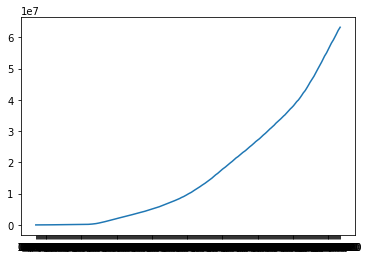

In [33]:
totalCasesInWorld = []
date = []
for X in alphas:
    column = ws2[X]
    Sum = 0
    for i in range(1,272):
        Sum+=column[i].value
    if isinstance(column[0].value, str): 
        date.append(column[0].value)
    else: 
        date.append(column[0].value.strftime('%d/%m/%Y'))
    totalCasesInWorld.append(Sum)
pyplot.plot(date,totalCasesInWorld)
pyplot.show()

<h2> Total Deaths World Wide </h2>

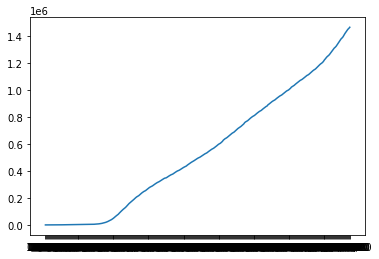

In [36]:
wb2 = load_workbook(r"D:\\time_series_covid19_deaths_global.xlsx")  # Work Book
ws2 = wb2[wb2.sheetnames[0]]
totalDeathsInWorld = []
date = []
for X in alphas:
    column = ws2[X]
    Sum = 0
    for i in range(1,272):
        Sum+=column[i].value
    if isinstance(column[0].value, str): 
        date.append(column[0].value)
    else: 
        date.append(column[0].value.strftime('%d/%m/%Y'))
    totalDeathsInWorld.append(Sum)
pyplot.plot(date,totalDeathsInWorld)
pyplot.show()

<h2> Heat Map for cases </h2>

In [41]:
df = pd.read_csv('COVID-19.csv')
# Interpolating circle to given circle range
list1 = df.cases.values.tolist()
m = interp1d([1, max(list1)], [5, 18])
circle_radius = m(list1)
typeLists = ['stamen-watercolor']
# 'open-street-map', 'carto-darkmatter', 'carto-positron', 'stamen-terrain', 
#              'stamen-toner', 
for i in typeLists:
    fig = px.density_mapbox(df, lat='Lat', lon='Long', radius=circle_radius, zoom=0, mapbox_style=i)
    fig.show()


<h2> Total cases and Deaths in India </h2>

In [61]:
wb = load_workbook("D:\owid-covid-data.xlsx")  # Work Book
ws = wb[wb.sheetnames[0]]
dataCol = "a b c d e f g h i j k l m n o p q r s t u v w x y z aa ab ac ad ae af ag ah ai aj ak al am an ao ap aq ar as at au av aw ax".upper().split(" ")
dataS5 = {}
for X in dataCol:
    column = ws[X]
    columnDate = ws['D']
    sample = []
    for x in range(1,len(columnDate)):
          sample.append(column[x].value)
    dataS5[column[0].value] = sample    
# print(dataS5)    

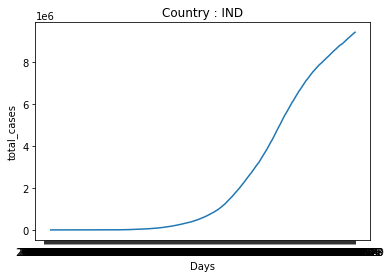

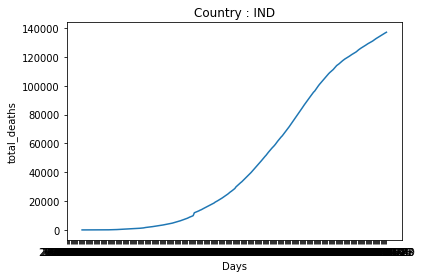

In [47]:
def dailyCasesPlotter(code,key):
    iso_codes = dataS5['iso_code']
    date = dataS5['date']
    total_cases = dataS5[key]
    total_cases_IND = []
    date_IND = []
    
    for x in range(len(iso_codes)):
        if iso_codes[x] == code:
            total_cases_IND.append(total_cases[x])
            date_IND.append(date[x])
    pyplot.plot(date_IND,total_cases_IND)
    pyplot.title("Country : " + code)
    pyplot.xlabel("Days")
    pyplot.ylabel(key)
    pyplot.show()

countriesToLookFor = ['IND']
for C in countriesToLookFor:    
    dailyCasesPlotter(C,'total_cases')
    dailyCasesPlotter(C,'total_deaths')

<H1> Hypothesis </H1>

<h2> Cases Across Different Countries :</h2>

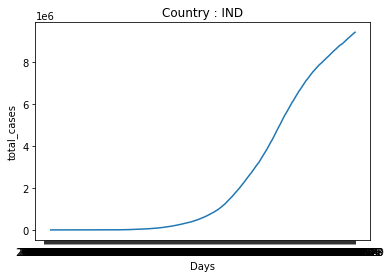

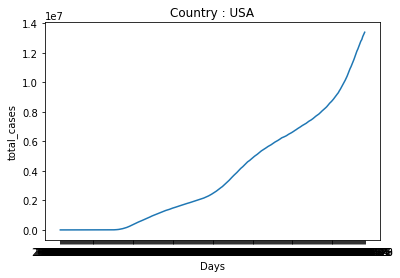

In [49]:
def dailyCasesPlotter(code,key):
    iso_codes = dataS5['iso_code']
    date = dataS5['date']
    total_cases = dataS5[key]
    total_cases_IND = []
    date_IND = []
    for x in range(len(iso_codes)):
        if iso_codes[x] == code:
            total_cases_IND.append(total_cases[x])
            date_IND.append(date[x])
    pyplot.plot(date_IND,total_cases_IND)
    pyplot.title("Country : " + code)
    pyplot.xlabel("Days")
    pyplot.ylabel(key)
    pyplot.show()

countriesToLookFor = ['IND','USA']
for C in countriesToLookFor:    
    dailyCasesPlotter(C,'total_cases')


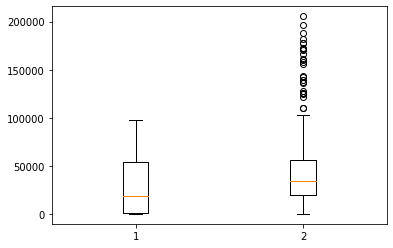

In [60]:
def dailyCasescomparison(code,key):
    iso_codes = dataS5['iso_code']
    date = dataS5['date']
    total_cases = dataS5[key]
    total_cases_IND = []
    date_IND = []
    for x in range(len(iso_codes)):
        if iso_codes[x] == code:
            if total_cases[x]!= None:
                total_cases_IND.append(total_cases[x])
            else:
                total_cases_IND.append(0)
            date_IND.append(date[x])
#     print(total_cases_IND)        
    return total_cases_IND

data=[]
countriesToLookFor = ['IND','USA']
for C in countriesToLookFor:    
    data.append(dailyCasescomparison(C,'new_cases'))
    
pyplot.boxplot(data)
pyplot.show()


<h2> Age Groups </h2>

dict_keys(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_faci

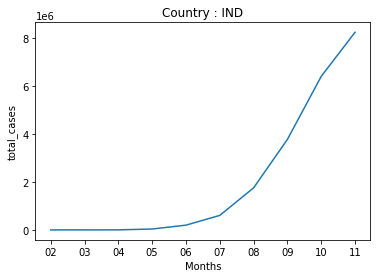

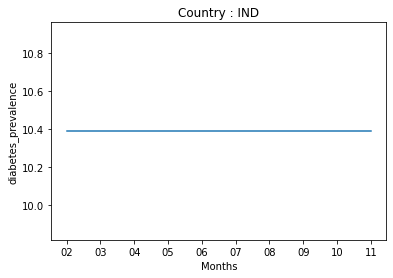

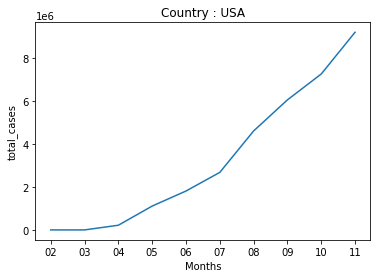

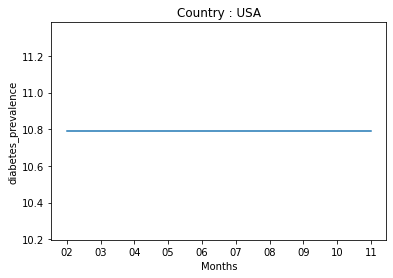

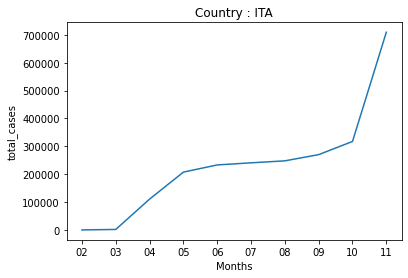

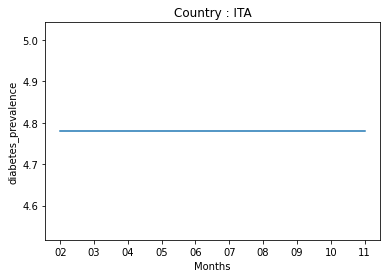

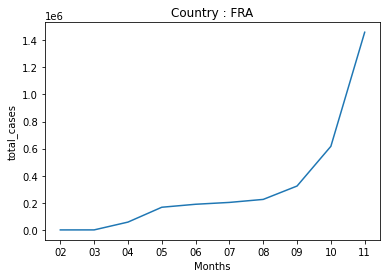

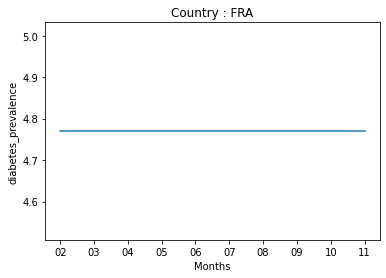

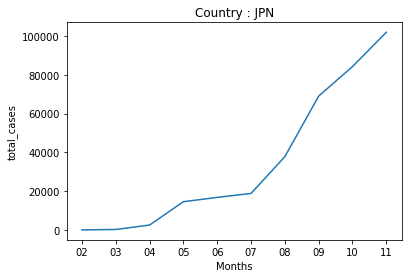

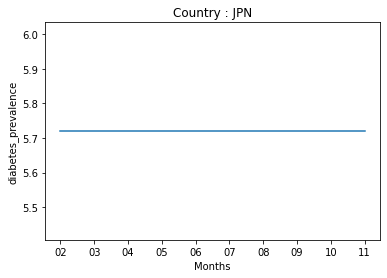

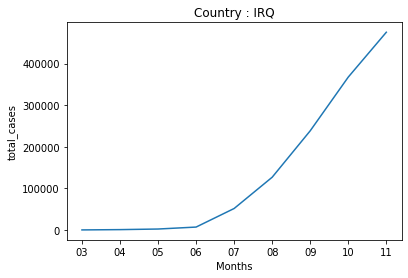

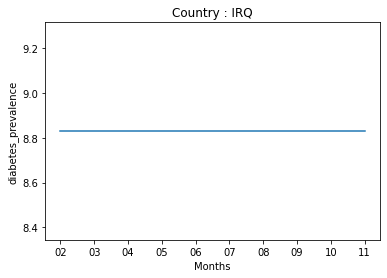

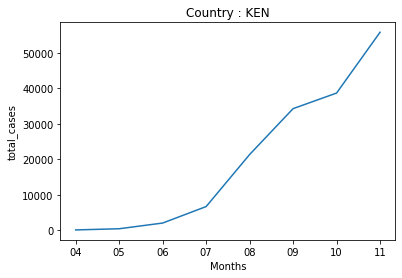

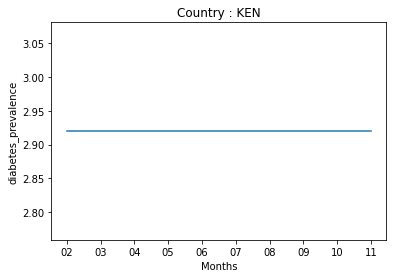

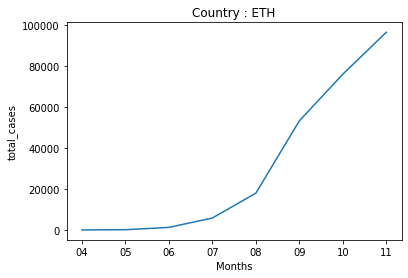

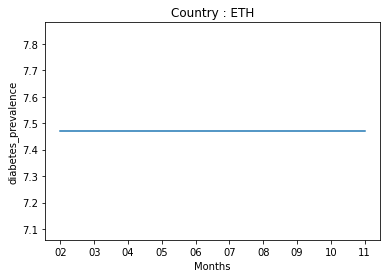

In [43]:
columnHeadings = dataS5.keys()
print(columnHeadings)
def totalMonthlyCasesPlotter(code,key):
    iso_codes = dataS5['iso_code']
    date = dataS5['date']
    total_cases = dataS5[key]
    total_cases_IND = []
    date_IND = []
    for x in range(len(iso_codes)):
        if iso_codes[x] == code:
            total_cases_IND.append(total_cases[x])
            date_IND.append(date[x][5:7])
    pyplot.plot(date_IND,total_cases_IND)
    pyplot.title("Country : " + code)
    pyplot.xlabel("Months")
    pyplot.ylabel(key)
    pyplot.show()

countriesToLookFor = ['IND','USA','ITA','FRA','JPN','IRQ','KEN','ETH']
for C in countriesToLookFor:    
    totalMonthlyCasesPlotter(C,'total_cases')
    totalMonthlyCasesPlotter(C,'diabetes_prevalence')

In [1]:
validDAta = {
    total_cases : True
    new_cases : True
    
}

SyntaxError: invalid syntax (<ipython-input-1-446e24c26fc3>, line 3)

In [2]:
# import important libraries



In [3]:
# Read csv file

df = pd.read_csv('COVID-19.csv')


In [4]:
# Interpolating circle to given circle range

list1 = df.cases.values.tolist()

m = interp1d([1, max(list1)], [5, 18])

circle_radius = m(list1)


In [12]:
# Plotting heatmap on top of world map

typeLists = ['open-street-map', 'carto-darkmatter', 'carto-positron', 'stamen-terrain', 
             'stamen-toner', 'stamen-watercolor']

for i in typeLists:
    print(i)
    fig = px.density_mapbox(df, lat='Lat', lon='Long', radius=10, zoom=0, mapbox_style=i)
    fig.show()


open-street-map


carto-darkmatter


carto-positron


stamen-terrain


stamen-toner


stamen-watercolor


world cases : 